In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df= pd.read_csv('Amazon Sale Report.csv')
df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\1032900706.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.shape

(128975, 24)

In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [6]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [7]:
df['Amount'].fillna(0, inplace=True)

df['currency'].fillna("N/A", inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\187937004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(0, inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\187937004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [8]:
df['Courier Status'].fillna("Cancelled", inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\2608328480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna("Cancelled", inplace=True)


In [9]:
df['ship-city'].fillna(df['ship-city'].mode()[0], inplace=True)
df['ship-state'].fillna(df['ship-state'].mode()[0], inplace=True)
df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0], inplace=True)
df['ship-country'].fillna(df['ship-country'].mode()[0], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\345764766.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna(df['ship-city'].mode()[0], inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\345764766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [10]:
df['promotion-ids'].fillna("N/A", inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\1102915569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['promotion-ids'].fillna("N/A", inplace=True)


In [11]:
df.drop(columns=['fulfilled-by', 'Unnamed: 22'], inplace=True)

In [12]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

In [13]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,609.363662,463899.030052
std,37232.019822,0.313354,313.347147,191498.352590
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,413.000000,382421.000000
50%,64487.000000,1.000000,583.000000,500033.000000
75%,96730.500000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


C:\Users\Hp\AppData\Local\Temp\ipykernel_20348\2233695049.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


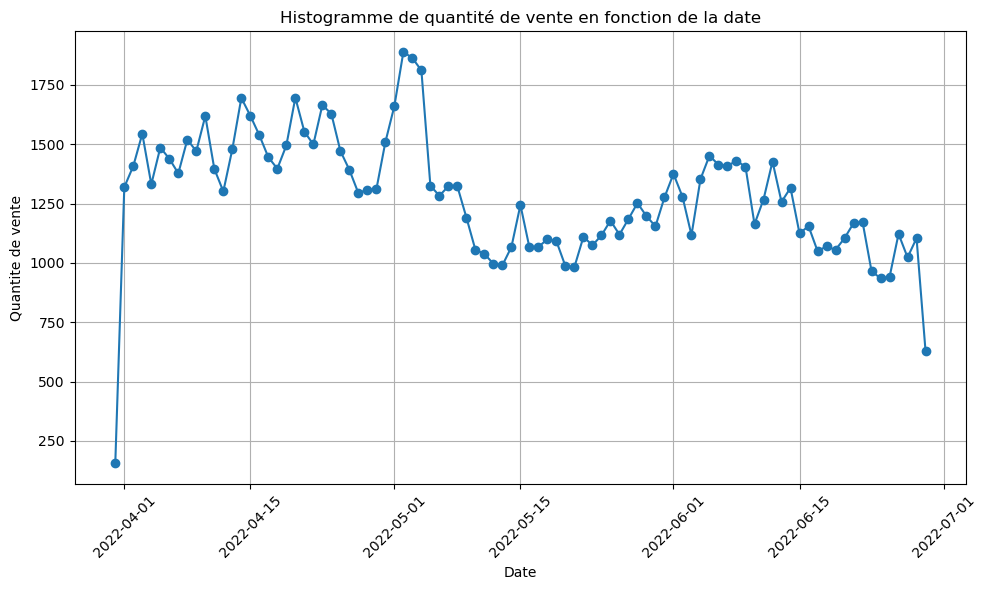

In [14]:
df['Date']=pd.to_datetime(df['Date'])
vente_par_date=df.groupby('Date').sum()
plt.figure(figsize=(10, 6))
plt.plot(vente_par_date.index, vente_par_date['Qty'],marker='o')
plt.title('Histogramme de quantité de vente en fonction de la date')
plt.xlabel('Date')
plt.ylabel('Quantite de vente')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

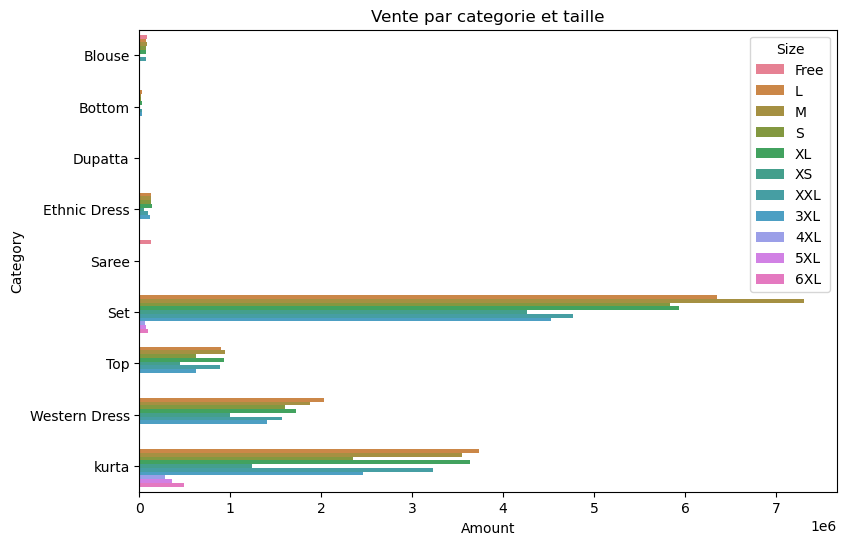

In [15]:
vente_par_categorie_et_par_taille= df.groupby(['Category', 'Size'])['Amount'].sum().reset_index()
plt.figure(figsize=(9, 6))
sns.barplot(x='Amount', y='Category', hue='Size', data=vente_par_categorie_et_par_taille)
plt.xlabel('Amount')
plt.ylabel('Category')
plt.title('Vente par categorie et taille')
plt.show()

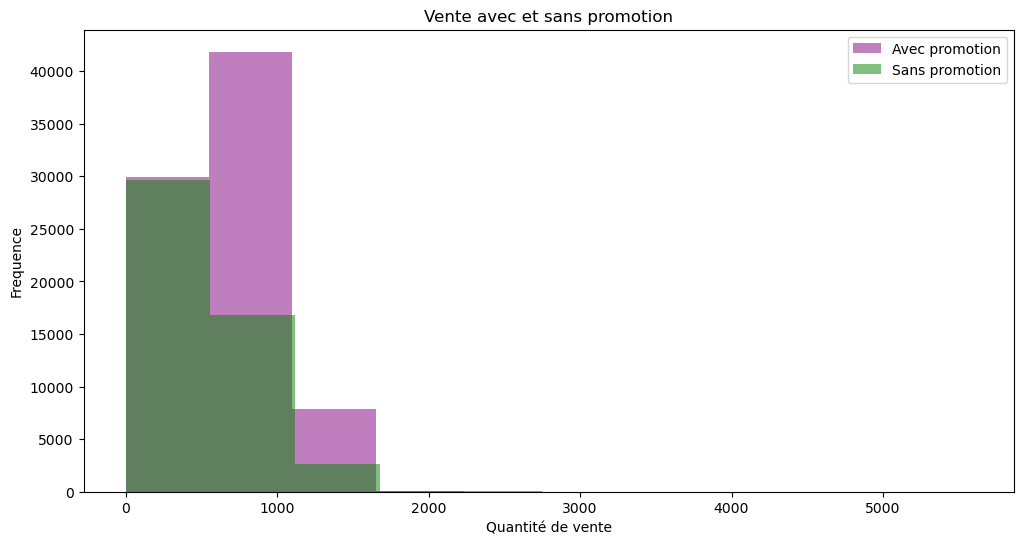

In [16]:
vente_promotion = df[df['promotion-ids']!=("N/A")]
vente_sans_promotion = df[df['promotion-ids']==("N/A")]
plt.figure(figsize=(12, 6))
plt.hist(vente_promotion['Amount'], alpha=0.5, label='Avec promotion', color="purple")
plt.hist(vente_sans_promotion['Amount'], alpha=0.5, label='Sans promotion', color="green")
plt.legend()
plt.title('Vente avec et sans promotion')
plt.xlabel('Quantité de vente')
plt.ylabel('Frequence')
plt.show()

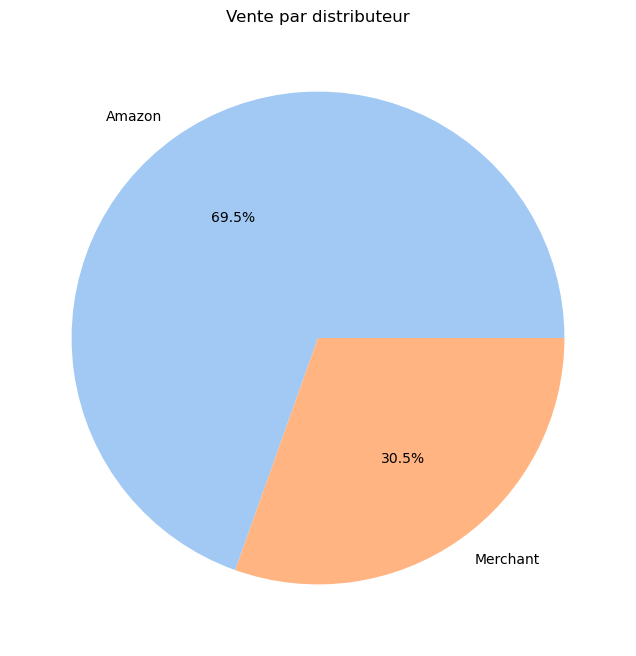

In [17]:
Fulfilment_counts = df['Fulfilment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Fulfilment_counts, labels=Fulfilment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Vente par distributeur")
plt.show()

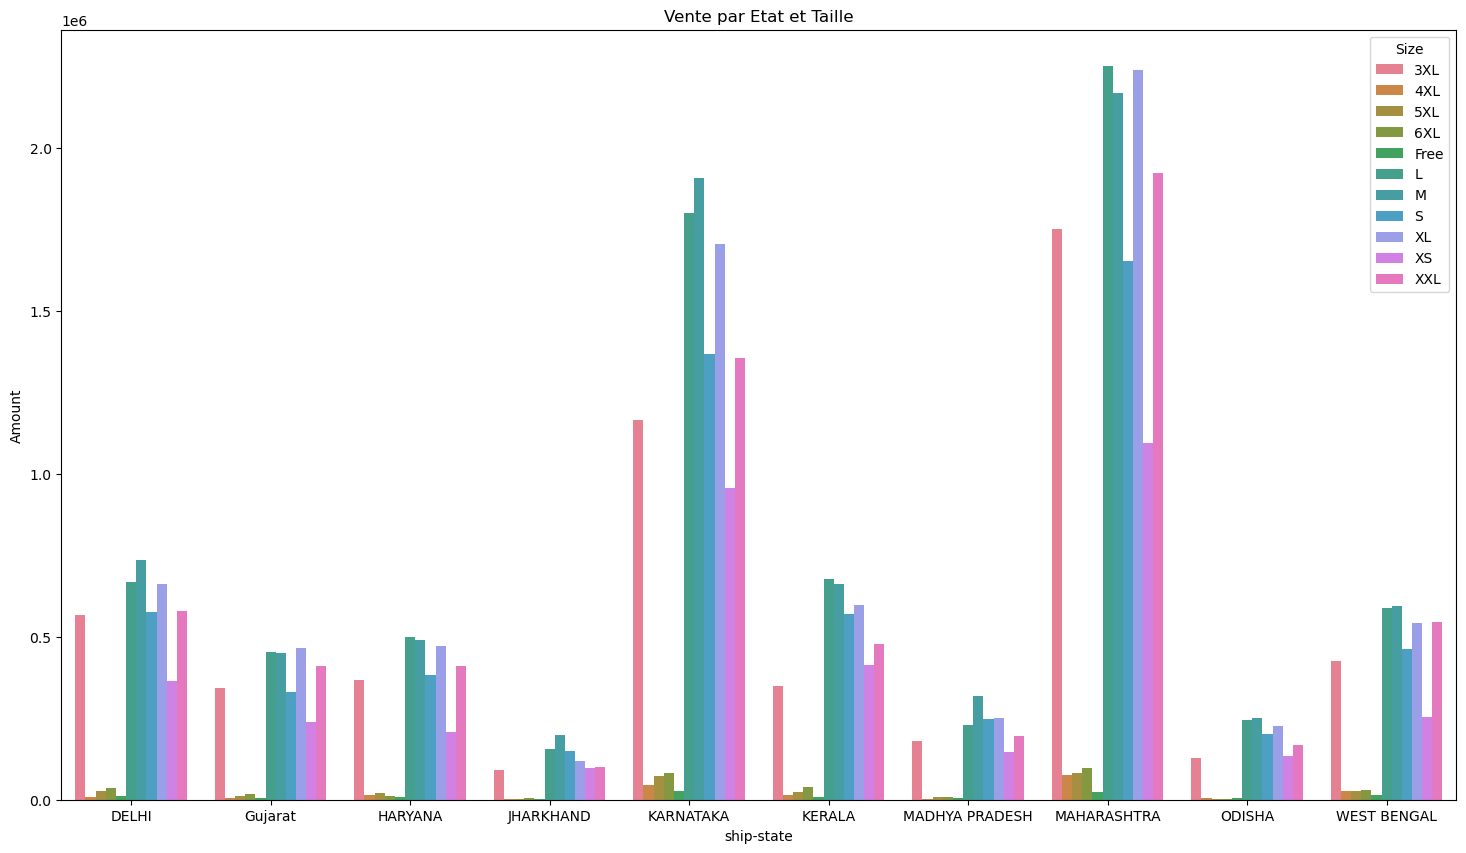

In [18]:
# 5. Análisis del Comportamiento del Cliente por Estado y Talla
vente_taille_etat = df.groupby(['ship-state', 'Size'])['Amount'].sum().reset_index()

# Se seleccionan los 10 estados con mayores ventas
top10_etat = vente_taille_etat['ship-state'].value_counts().head(10).index
top10_vente_taille_etat= vente_taille_etat[vente_taille_etat['ship-state'].isin(top10_etat)]
plt.figure(figsize=(18, 10))
sns.barplot(x='ship-state', y='Amount', hue='Size', data= top10_vente_taille_etat)
plt.title('Vente par Etat et Taille')
plt.show()

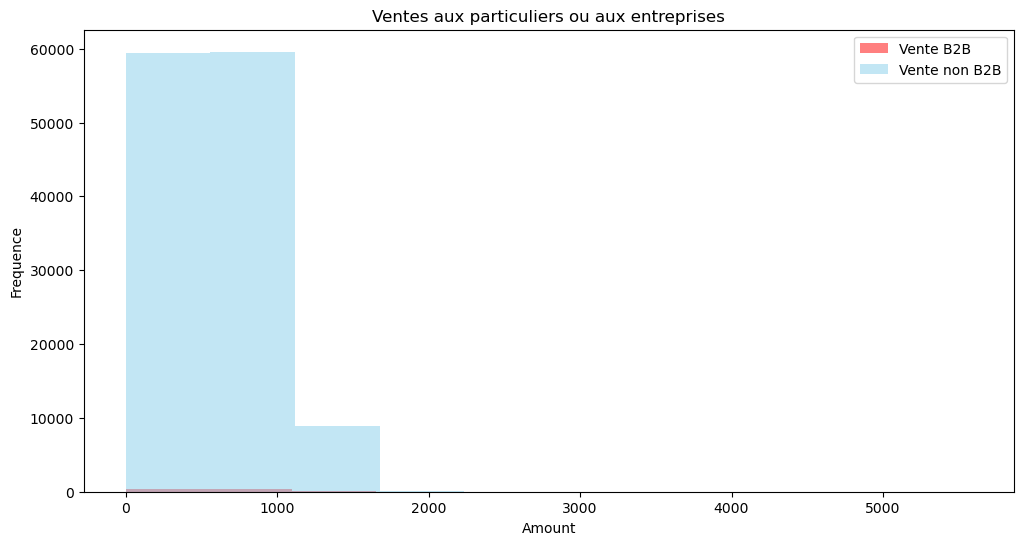

In [19]:
vente_B2B = df[df['B2B'] == True]
vente_non_B2B = df[df['B2B'] == False]
plt.figure(figsize=(12, 6))
plt.hist(vente_B2B['Amount'], alpha=0.5, label='Vente B2B', color="red")
plt.hist(vente_non_B2B['Amount'], alpha=0.5, label='Vente non B2B', color="skyblue")
plt.legend()
plt.title('Ventes aux particuliers ou aux entreprises')
plt.xlabel('Amount')
plt.ylabel('Frequence')
plt.show()

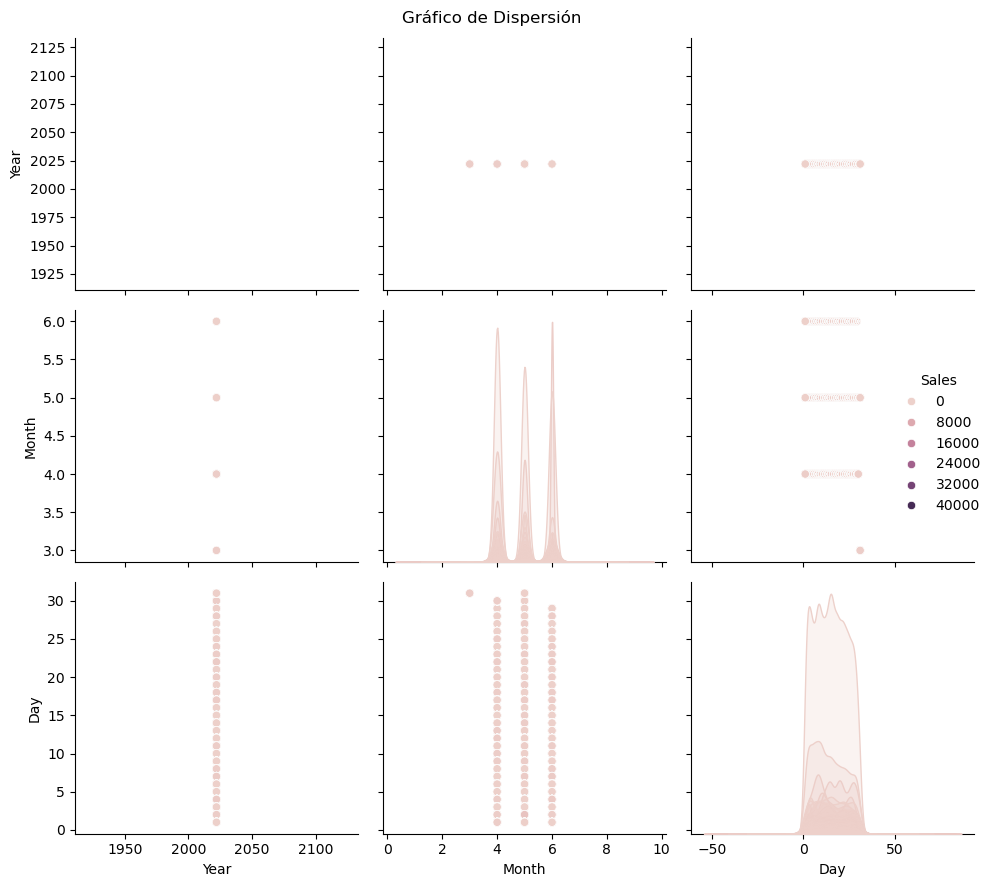

MAE: 260.6104094984478
MSE: 141328.02156975385
Predicted Sales for 2030-08-01: 641.2189209765721


In [20]:
# # 1. Se importan las librerias para emplear la regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# # 2. Se tranforma la variable fecha a una variable de fecha real manipulable
df['Date'] = pd.to_datetime(df['Date'])

# # 3. Se utiliza la función drop para eliminar valores nulos
df = df.dropna()

# # 4. Se crean las variables de fecha
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# # 5. Se crea la variable ventas la cual es la multiplicación de la cantidad por el monto
df['Sales'] = df['Qty'] * df['Amount']

# # 6. se definen cuales seran las X y la Y
X = df[['Year', 'Month', 'Day']]
y = df['Sales']

# # 7. Se separan los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sns.pairplot(df[['Year', 'Month', 'Day', 'Sales']], hue= 'Sales', height=3)
plt.suptitle('Gráfico de Dispersión')
plt.tight_layout()
plt.show()

# # 8. Se crea el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# # 9. Se hacen las predicciones
y_pred = model.predict(X_test)

# # 10. Se evalua el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')

# # 11. Se hace la predicción para una fecha específica
future_date = pd.DataFrame({'Year': [2030], 'Month': [8], 'Day': [1]})
future_sales = model.predict(future_date)

print(f'Predicted Sales for 2030-08-01: {future_sales[0]}')


In [21]:
# # se utiliza la funcion R2 para evaluar el modelo
r2_score: float = model.score(X_test, y_test)
print(f'R2 Score: {r2_score}')

R2 Score: 0.001522761142485507


In [ ]:
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn.feature_selection import SelectKBest, f_regression

# Asegurarse de que la columna de fecha esté en el formato correcto
#df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

## Eliminar filas con valores nulos
#df = df.dropna()

# Crear características a partir de la columna de fecha
#df['Year'] = df['Date'].dt.year
#df['Month'] = df['Date'].dt.month
#df['Day'] = df['Date'].dt.day

# Convertir 'Cantidad' y 'Monto' a valores numéricos
#df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
#df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Eliminar filas con valores nulos después de la conversión
#df = df.dropna(subset=['Qty', 'Amount'])

# Crear una característica de ventas basada en la cantidad y el monto
#df['Vente'] = df['Qty'] * df['Amount']

# Seleccionar un subconjunto más pequeño de columnas categóricas
#categorical_cols = ['Category', 'Size']  # He reducido el número de columnas categóricas
#df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Seleccionar características relevantes y la variable objetivo
#features = ['Year', 'Month', 'Day'] + [col for col in df.columns if col.startswith(('Category_', 'Size_'))]
#X = df[features]
#y = df['Vente']

# Seleccionar las mejores características
#selector = SelectKBest(f_regression, k=10)  # Seleccionar las 10 mejores características
#X_new = selector.fit_transform(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Escalar los datos
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Inicializar y entrenar el modelo de K-Nearest Neighbors con GridSearchCV para optimización
#param_grid = {
#    'n_neighbors': [3, 5, 7, 10],
#    'weights': ['uniform', 'distance'],
#    'metric': ['euclidean', 'manhattan']
#}
#grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)

# Mejor modelo de KNN
#best_knn_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
#y_pred_knn = best_knn_model.predict(X_test)

# Evaluar el modelo de KNN
#mae_knn = mean_absolute_error(y_test, y_pred_knn)
#mse_knn = mean_squared_error(y_test, y_pred_knn)
#print(f'KNN Optimizado - MAE: {mae_knn}, MSE: {mse_knn}')

# Predecir ventas para una fecha específica con el mejor modelo
#future_date = pd.DataFrame({'Year': [2030], 'Month': [8], 'Day': [1]})
# Agregar columnas dummy faltantes
#for col in X.columns:
 #   if col not in future_date.columns:
#        future_date[col] = 0

#future_date = selector.transform(future_date)
#future_date = scaler.transform(future_date)
#future_sales = best_knn_model.predict(future_date)

#print(f'Predicted Sales for 2030-08-01: {future_sales[0]}')


In [ ]:
#r2_score: float = best_knn_model.score(X_test, y_test)
#print(f'R2 Score: {r2_score}')

**Conclusion**
